# Guided Project: Star Wars Survey

This project focuses on answering the question the team at [FiveThirtyEight](https://fivethirtyeight.com) asked: 'Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?'. 

In order to find out about 'Star Wars' fans' preferences, they surveyed them using the online tool SurveyMonkey. 

In this project we will explore and analyze collected data.

## Import libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the data

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")[1:]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


As we can see, this data has several columns from which some ask questions about 'Star Wars' movies and some contain information about interviewee.

There are several questions where the respondent had to check one or more boxes - it is hard to represent that kind of data in one column.

In [3]:
col_names = star_wars.columns
print(col_names)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data Cleaning



First we will focus on columns which represent 'Yes/No' type of questions. These are:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Currently, both columns are string types (they mainly contain 'yes' and 'no' values, with some NaN). We will convert them to a boolean to make them easier to work with later on.

In [4]:
convert_yes_no = {'Yes': True,
                  'No': False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(convert_yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(convert_yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


After we did that we can take care of the question:...
* Which of the following Star Wars films have you seen? Please select all that apply?

...which is represented by six single checkbox columns. Each 'Unnamed: (number)' column represents one film from 'Star Wars' universum. If the value in a cell is filled with the name of the movie it means the respondent saw it. NaN can mean two things: either the respondent didn't see it or didn't answer the question - we will just asume they didn't see it.

We will convert this columns to a boolean and then rename them, so they are more 
intuitive. 

In [5]:
movie_mapping = {'Star Wars: Episode I  The Phantom Menace': True,
                 'Star Wars: Episode II  Attack of the Clones': True,
                 'Star Wars: Episode III  Revenge of the Sith': True,
                 'Star Wars: Episode IV  A New Hope': True,
                 'Star Wars: Episode V The Empire Strikes Back': True,
                 'Star Wars: Episode VI Return of the Jedi': True,
                 np.nan: False,
                }

movie_num = 1

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    star_wars = star_wars.rename(columns={col:'seen_{num}'.format(num = movie_num)})
    movie_num += 1
                                             
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next six columns asks the respondent to rank the movies from 1 (most favorite) to 6 (least favorite). Each of this string type column contains number in the range of 1 to 6 or NaN.

We will convert these columns to numerical type and rename them, like we renamed previous ones.

In [6]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

movie_rank = 1
for col in star_wars.columns[9:15]:
    star_wars = star_wars.rename(columns={col:'ranking_{num}'.format(num = movie_rank)})
    movie_rank += 1
                                             
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Movies ranking

Now as we cleaned our data we can easily find the highest ranked movie - we will just calculate the mean of each 'ranking'. We have to remember, the LOWER the ranking the BETTER.

In [11]:
movies_ranking = star_wars[star_wars.columns[9:15]].mean()
print(movies_ranking)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


<AxesSubplot:>

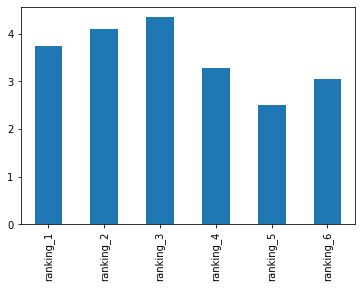

In [17]:
%matplotlib inline
movies_ranking.plot.bar()

As we can see the 5th movie - 'Star Wars: Episode V The Empire Strikes Back', made in 1980 - is the highest ranked among respondents. Two other films in the TOP3 are 'Star Wars: Episode IV A New Hope' (1977) and 'Star Wars: Episode VI Return of the Jedi' (1983).

It looks like our responders are sentimental. The movies from 'original trilogy' are highly rated than the newer ones. 

## Movies view count

In [18]:
movies_view_count = star_wars[star_wars.columns[3:9]].sum()
print(movies_view_count)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


<AxesSubplot:>

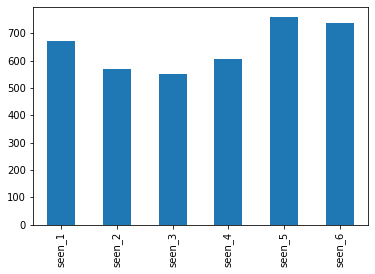

In [19]:
%matplotlib inline
movies_view_count.plot.bar()

As expected, two highest rated movies are also the most viewed ones. 

It's interesting, that the 'Star Wars: Episode I – The Phantom Menace' (1999) ('seen_1' on the plot) also has high view count, visibly higher than other two 'new' movies. It might be due to the fact it's the first movie of 'Prequel trilogy' and it was awaited for quite a long time.

## Franchise fans vs. casual viewers

At the end of this project we will find out if being 'Star Wars' franchise fan determines how respondents valued each movie and if it differed from answers given by 'casual' viewers. We will analize data in this column: 

* Do you consider yourself to be a fan of the Star Wars film franchise?

In [43]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

print('Number of fans: {0}\nNumber of non-fans: {1}'.format(len(fans), len(non_fans)))

Number of fans: 552
Number of non-fans: 284


<AxesSubplot:>

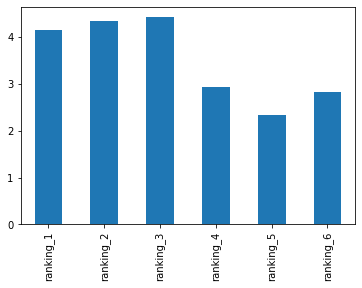

In [49]:
fans_rank = fans[fans.columns[9:15]].mean()

%matplotlib inline
fans_rank.plot.bar()

<AxesSubplot:>

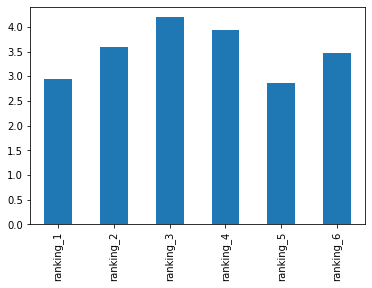

In [50]:

non_fans_rank = non_fans[non_fans.columns[9:15]].mean()

%matplotlib inline
non_fans_rank.plot.bar()

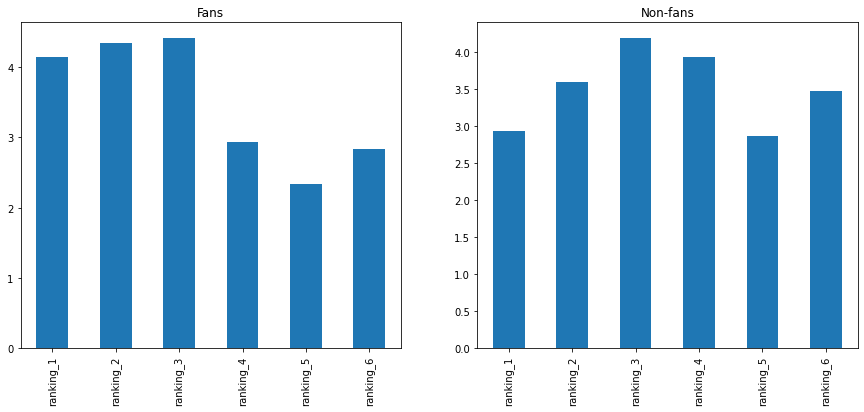

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
fans_rank.plot.bar(ax=ax1)
non_fans_rank.plot.bar(ax=ax2)
ax1.title.set_text('Fans')
ax2.title.set_text('Non-fans')
plt.show()

While looking at the barplot representing 'Fans' responses we can clearly see that 'Star Wars' franchise fans value older films from 'original' trilogy much higher than the new ones. In case of 'non-fans' plot it's more 'flat' and the disproportion between certain movies isn't that big. Two analyzed groups have one thing in common - both consider 'Star Wars: Episode V The Empire Strikes Back' to be the best film.

## Conclusion

Taking everything we analyzed in this project into consideration, given the collected data, we can asume that the FiveThirtyEight team might be right asking the question mentioned at the beggining on this project - 'Star Wars: Episode V The Empire Strikes Back' is indeed the highest rated and viewed movie of all 'Star Wars' films. Not only among fans but also casual viewers.